In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import json
from os.path import expanduser

In [3]:
experiment_name = 'P3856'
feature_detection_method = 'pasef'

IDENTIFICATIONS_WITH_FMDW_DIR = '{}/P3856-results-cs-false-fmdw-true-2021-05-02-00-42-31/identifications-pasef'.format(expanduser("~"))
IDENTIFICATIONS_WITH_FMDW_FILE = '{}/exp-{}-identifications-{}-recalibrated.pkl'.format(IDENTIFICATIONS_WITH_FMDW_DIR, experiment_name, feature_detection_method)

In [4]:
IDENTIFICATIONS_WITH_FMDW_FILE

'/home/daryl/P3856-results-cs-false-fmdw-true-2021-05-02-00-42-31/identifications-pasef/exp-P3856-identifications-pasef-recalibrated.pkl'

In [5]:
MAXIMUM_Q_VALUE = 0.01

#### identifications with mass defect window filtering

In [6]:
# load the identifications that had saturated points in the mono
with open(IDENTIFICATIONS_WITH_FMDW_FILE, 'rb') as handle:
    d = pickle.load(handle)
identifications_with_fmdw_df = d['identifications_df']
identifications_with_fmdw_df = identifications_with_fmdw_df[(identifications_with_fmdw_df['percolator q-value'] <= MAXIMUM_Q_VALUE)]

#### identifications without mass defect window filtering

In [7]:
IDENTIFICATIONS_WITHOUT_FMDW_DIR = '{}/P3856-results-cs-false-fmdw-false-2021-05-01-21-45-51/identifications-pasef'.format(expanduser("~"))
IDENTIFICATIONS_WITHOUT_FMDW_FILE = '{}/exp-{}-identifications-{}-recalibrated.pkl'.format(IDENTIFICATIONS_WITHOUT_FMDW_DIR, experiment_name, feature_detection_method)


In [8]:
# load the identifications that had saturated points in the mono
with open(IDENTIFICATIONS_WITHOUT_FMDW_FILE, 'rb') as handle:
    d = pickle.load(handle)
identifications_without_fmdw_df = d['identifications_df']
identifications_without_fmdw_df = identifications_without_fmdw_df[(identifications_without_fmdw_df['percolator q-value'] <= MAXIMUM_Q_VALUE)]

In [9]:
selected_feature_id = identifications_without_fmdw_df.sample(n=1).iloc[0].feature_id

In [10]:
selected_feature_without_fmdw = identifications_without_fmdw_df[(identifications_without_fmdw_df.feature_id == selected_feature_id)]
selected_feature_without_fmdw

,mono_mz_lower,mono_mz_upper,scan_apex,scan_lower,scan_upper,rt_apex,rt_lower,rt_upper,mono_intensity_without_saturation_correction,mono_intensity_with_saturation_correction,...,percolator q-value,percolator PEP,total matches/spectrum,sequence,protein id,flanking aa,observed_monoisotopic_mass,theoretical_peptide_mass,mass_accuracy_ppm,mass_error
3848,886.409218,886.465684,223.0,199,246,1952.127626,1948.951715,1955.302596,57595,57595,...,0.000186,0.00017,10189.1,VWDAVSGDELMTLAHK,sp|Q9Y3F4|STRAP_HUMAN,KH,1770.860831,1770.861,-0.095277,-0.000169


In [11]:
len(json.loads(selected_feature_without_fmdw.iloc[0].fragment_ions_l))

117

In [12]:
selected_feature_with_fmdw = identifications_with_fmdw_df[(identifications_with_fmdw_df.feature_id == selected_feature_id)]
selected_feature_with_fmdw

,mono_mz_lower,mono_mz_upper,scan_apex,scan_lower,scan_upper,rt_apex,rt_lower,rt_upper,mono_intensity_without_saturation_correction,mono_intensity_with_saturation_correction,...,percolator q-value,percolator PEP,total matches/spectrum,sequence,protein id,flanking aa,observed_monoisotopic_mass,theoretical_peptide_mass,mass_accuracy_ppm,mass_error
3848,886.409218,886.465684,223.0,199,246,1952.127626,1948.951715,1955.302596,57595,57595,...,0.000193,0.000025,10101.5,VWDAVSGDELMTLAHK,sp|Q9Y3F4|STRAP_HUMAN,KH,1770.860902,1770.861,-0.055148,-0.000098


In [13]:
len(json.loads(selected_feature_with_fmdw.iloc[0].fragment_ions_l))

109

#### unique identifications found with and without mass defect window filtering

In [14]:
sequences_l = []
for group_name,group_df in identifications_with_fmdw_df.groupby(['sequence','charge'], as_index=False):
    sequence = group_name[0]
    charge = group_name[1]
    percolator_score = group_df['percolator score'].median()
    q_value = group_df['percolator q-value'].median()
    sequences_l.append({'sequence':sequence, 'charge':charge, 'score':percolator_score, 'q_value':q_value})
sequences_with_fmdw_df = pd.DataFrame(sequences_l)

In [15]:
sequences_l = []
for group_name,group_df in identifications_without_fmdw_df.groupby(['sequence','charge'], as_index=False):
    sequence = group_name[0]
    charge = group_name[1]
    percolator_score = group_df['percolator score'].median()
    q_value = group_df['percolator q-value'].median()
    sequences_l.append({'sequence':sequence, 'charge':charge, 'score':percolator_score, 'q_value':q_value})
sequences_without_fmdw_df = pd.DataFrame(sequences_l)

In [16]:
print('{} unique ids with fmdw, {} without'.format(len(sequences_with_fmdw_df), len(sequences_without_fmdw_df)))

8028 unique ids with fmdw, 8021 without


In [17]:
combined_df = pd.merge(sequences_with_fmdw_df, sequences_without_fmdw_df, how='inner', left_on=['sequence','charge'], right_on=['sequence','charge'], suffixes=['_with_fmdw','_without_fmdw'])


In [18]:
combined_df.sample(n=5)

,sequence,charge,score_with_fmdw,q_value_with_fmdw,score_without_fmdw,q_value_without_fmdw
408,APDPAYIYDEFLQQR,2,0.751566,0.000193,0.741932,0.000186
5759,RFEIINAIYEPTEEECEWKPDEEDEISEELKEK,4,0.079138,0.003478,0.021736,0.006869
1923,FIDHVETTLAR,2,0.268804,0.000628,0.238795,0.000614
7176,VIVVGGGDTGNDCLGTSVR,2,0.869230,0.000193,0.820049,0.000186
397,ANNSQEPSPQLASSVASTR,2,0.433716,0.000424,0.450302,0.000307


#### compare identification score with and without

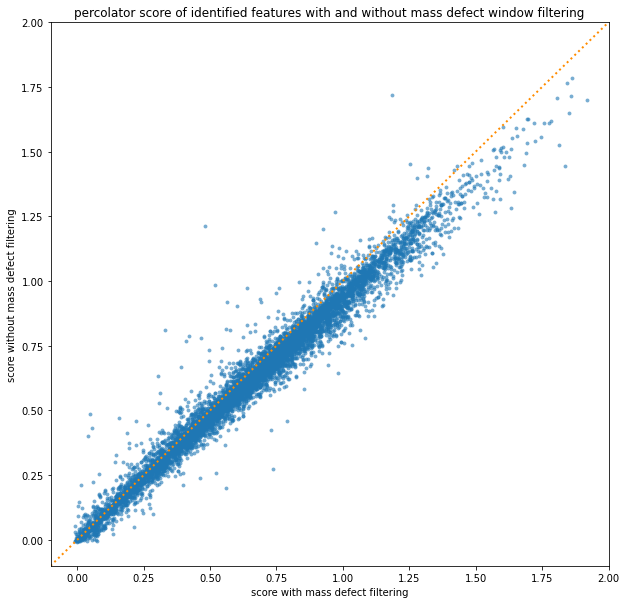

In [19]:
f, ax = plt.subplots()
f.set_figheight(10)
f.set_figwidth(10)

plt.margins(0.06)
plt.title('percolator score of identified features with and without mass defect window filtering')

ax.scatter(combined_df.score_with_fmdw, combined_df.score_without_fmdw, marker='o', lw=0, s=15, alpha=0.6)

ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle=':', linewidth=2, color='darkorange')

plt.xlim((-0.1,2.0))
plt.ylim((-0.1,2.0))

plt.xlabel('score with mass defect filtering')
plt.ylabel('score without mass defect filtering')

plt.show()

##### show percentage improvement for each identification in common

In [34]:
combined_df = combined_df[(combined_df.score_without_fmdw != 0)]
combined_df['score_improvement'] = (combined_df.score_with_fmdw - combined_df.score_without_fmdw) / combined_df.score_without_fmdw * 100.0

In [38]:
combined_df.score_improvement.mean()

16.405605259503275

In [45]:
df = combined_df[abs(combined_df.score_improvement) <= 500]

In [50]:
average_improvement = df.score_improvement.mean()
average_improvement

6.71525402163507

In [55]:
median_improvement = df.score_improvement.median()
median_improvement

5.631425651707555

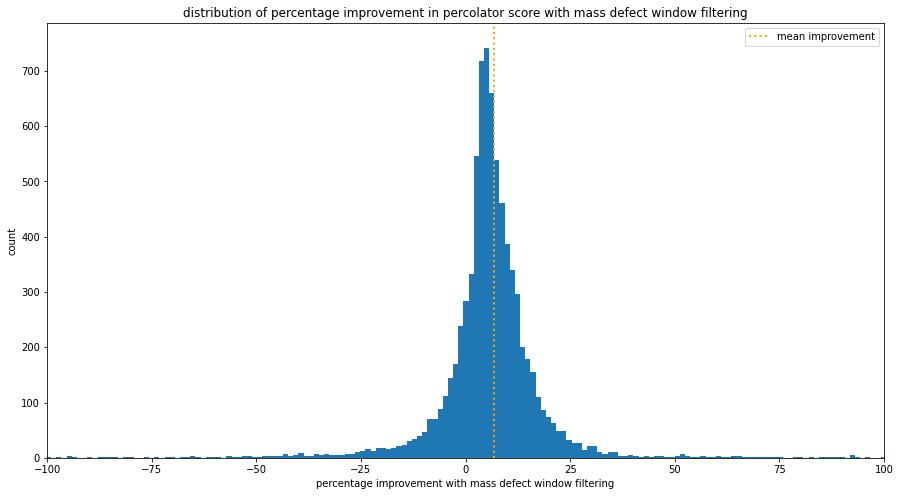

In [57]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('distribution of percentage improvement in percolator score with mass defect window filtering')

bins = 800
hist, bins, _ = plt.hist(df.score_improvement, bins=bins)
plt.xlabel('percentage improvement with mass defect window filtering')
plt.ylabel('count')

plt.xlim((-100,100))
# plt.ylim((0,300))

plt.axvline(x=average_improvement, linestyle=':', linewidth=2, color='orange', label='mean improvement')

plt.legend()
plt.show()

#### compare identification q-value with and without

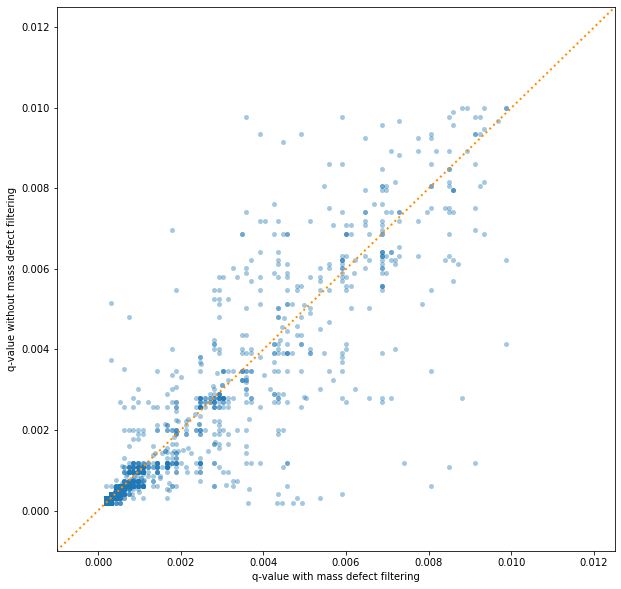

In [21]:
f, ax = plt.subplots()
f.set_figheight(10)
f.set_figwidth(10)

plt.margins(0.06)
plt.title('')

ax.scatter(combined_df.q_value_with_fmdw, combined_df.q_value_without_fmdw, marker='o', lw=0, s=25, alpha=0.4)

ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle=':', linewidth=2, color='darkorange')

plt.xlim((-0.001,0.0125))
plt.ylim((-0.001,0.0125))

plt.xlabel('q-value with mass defect filtering')
plt.ylabel('q-value without mass defect filtering')

plt.show()

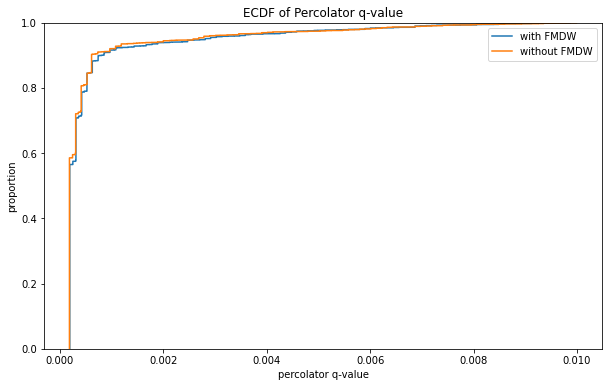

In [22]:
import seaborn as sns

plt.figure(figsize=(10, 6))

title = 'ECDF of Percolator q-value'
plt.title(title)

ax = sns.ecdfplot(data=combined_df, x="q_value_with_fmdw", label='with FMDW')
_ = sns.ecdfplot(data=combined_df, x="q_value_without_fmdw", label='without FMDW')
plt.legend(loc='best')
_ = ax.set(xlabel='percolator q-value', ylabel='proportion')

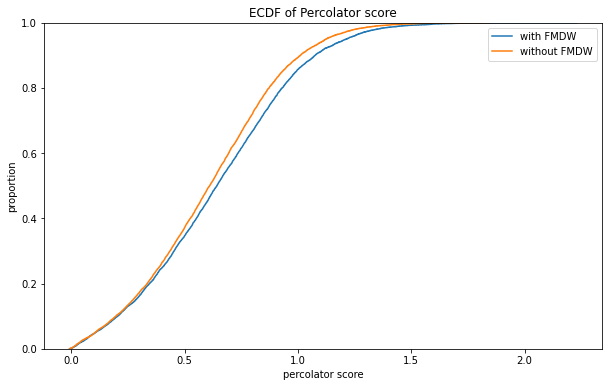

In [23]:
import seaborn as sns

plt.figure(figsize=(10, 6))

title = 'ECDF of Percolator score'
plt.title(title)

ax = sns.ecdfplot(data=combined_df, x="score_with_fmdw", legend=True, label='with FMDW')
_ = sns.ecdfplot(data=combined_df, x="score_without_fmdw", legend=True, label='without FMDW')
plt.legend(loc='best')
_ = ax.set(xlabel='percolator score', ylabel='proportion')

/home/daryl/anaconda3/envs/py36/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/daryl/anaconda3/envs/py36/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


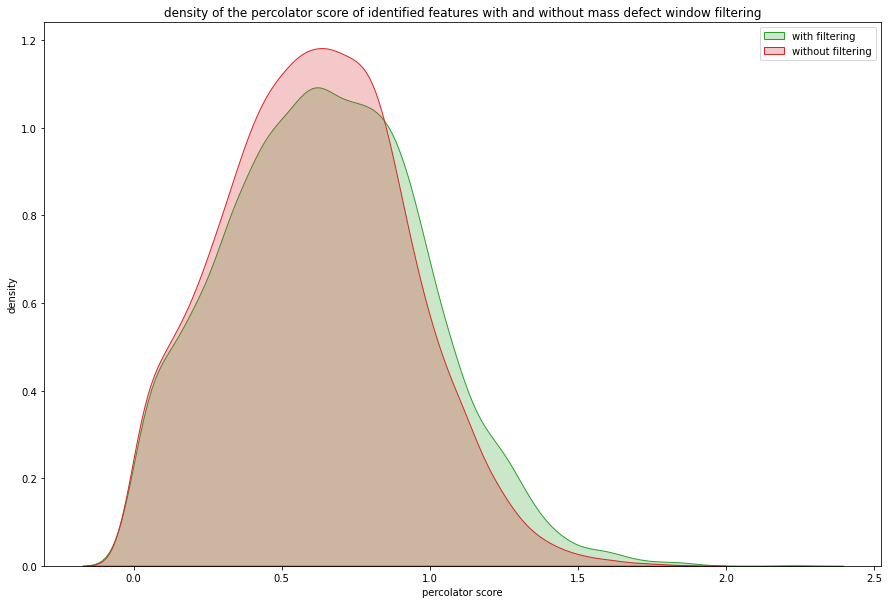

In [24]:
import seaborn as sns
plt.figure(figsize=(15, 10))

title = 'density of the percolator score of identified features with and without mass defect window filtering'
plt.title(title)

# plt.xlim((-4,4))
# plt.ylim((0,1))

ax = sns.distplot(combined_df.score_with_fmdw, hist = False, color='tab:green', kde = True, kde_kws = {'shade': True, 'linewidth': 1}, label = 'with filtering')
_ = sns.distplot(combined_df.score_without_fmdw, hist = False, color='tab:red', kde = True, kde_kws = {'shade': True, 'linewidth': 1}, label = 'without filtering')

_ = ax.set(xlabel='percolator score', ylabel='density')
_ = ax.legend()